In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.96399061],
       [2.97644908]])

In [4]:
eta = 0.1
n_iter = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(n_iter):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grad

In [5]:
theta

array([[3.96399061],
       [2.97644908]])

In [6]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grads = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * grads
        

In [7]:
theta

array([[3.98990025],
       [2.98237006]])

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.4933531])

In [11]:
X_poly[0]

array([-1.4933531 ,  2.23010348])

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_poly, y)
linreg.intercept_, linreg.coef_

(array([2.09556976]), array([[0.85319377, 0.51087704]]))

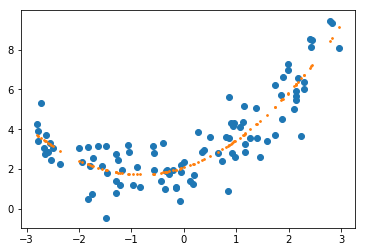

In [13]:
preds = linreg.predict(X_poly)
plt.scatter(X, y)
plt.scatter(X, preds, s=3)
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

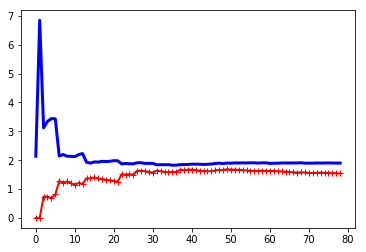

In [15]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

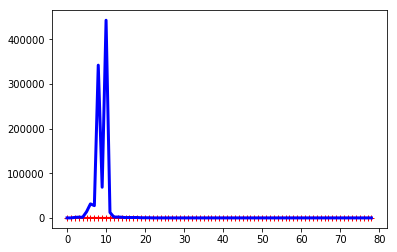

In [16]:
from sklearn.pipeline import Pipeline
polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(polynomial_reg, X, y)

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [18]:
ridge_reg.predict([[1.5]])

array([[4.63489896]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.60977407])

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

list(iris.keys())

/home/mahmoud/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


['data', 'target_names', 'feature_names', 'target', 'filename', 'DESCR']

In [3]:
import numpy as np
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/mahmoud/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

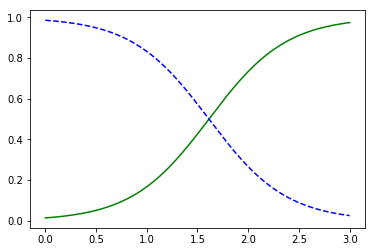

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")